<a href="https://colab.research.google.com/github/CoriRay/Python-para-economistas/blob/master/Clase_4_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


**Parte 1 : Regresión Lineal Simple**

In [0]:
#La data para la primera regresión fue extraída del BCRP. 
#Sitios web, como el del BCRP cuentan con información cifrada o algún tipo de certificado.
#El siguiente código permite desbloquear data con las restricciones antes mencionadas.
#https://medium.com/@moreless/how-to-fix-python-ssl-certificate-verify-failed-97772d9dd14c 
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
  ssl._create_default_https_context = ssl._create_unverified_context

In [0]:
#Se tomó data del PBI mensual y las exportaciones tradicionales mensuales. Procederamos a cargarlas:
link1=('https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01770AM/html')
bcrp_pbi=pd.read_html(link1)


In [0]:
#Observemos también que la página del BCRP cuenta con un conjunto de tablas. Pandas toma cada tabla como si fuera un elemento. El elemento
#1   
pbi=bcrp_pbi[1]

In [0]:
pbi.head()

,Fecha,Producto bruto interno y demanda interna (índice 2007=100) - PBI
0,Ene03,73.2
1,Feb03,71.1
2,Mar03,74.3
3,Abr03,80.7
4,May03,83.2


In [0]:
link2=('https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01449BM/html')
bcrp_bc=pd.read_html(link2)
bc=bcrp_bc[1]

In [0]:
bc.head()

,Fecha,Balanza comercial - valores FOB (millones US$) - Exportaciones - Productos Tradicionales
0,Ene85,137
1,Feb85,164
2,Mar85,206
3,Abr85,202
4,May85,198


In [0]:
bc['Fecha'].head(301)

0      Ene85
1      Feb85
2      Mar85
3      Abr85
4      May85
       ...  
296    Sep09
297    Oct09
298    Nov09
299    Dic09
300    Ene10
Name: Fecha, Length: 301, dtype: object

In [0]:
bc['Fecha'].tail()

416    Sep19
417    Oct19
418    Nov19
419    Dic19
420    Ene20
Name: Fecha, dtype: object

In [0]:
pbi['Fecha'].head(85)

0     Ene03
1     Feb03
2     Mar03
3     Abr03
4     May03
      ...  
80    Sep09
81    Oct09
82    Nov09
83    Dic09
84    Ene10
Name: Fecha, Length: 85, dtype: object

In [0]:
pbi['Fecha'].tail()

200    Sep19
201    Oct19
202    Nov19
203    Dic19
204    Ene20
Name: Fecha, dtype: object

In [0]:
bc_2010=bc.iloc[300:,:]
bc_2010.head()

,Fecha,Balanza comercial - valores FOB (millones US$) - Exportaciones - Productos Tradicionales
300,Ene10,1927
301,Feb10,2095
302,Mar10,2216
303,Abr10,2059
304,May10,1841


In [0]:
pbi_2010=pbi.iloc[84:,:]

In [0]:
pbi_2010.head()

,Fecha,Producto bruto interno y demanda interna (índice 2007=100) - PBI
84,Ene10,106.2
85,Feb10,106.1
86,Mar10,115.8
87,Abr10,117.5
88,May10,123.0


In [0]:
pbi_2010.shape

(121, 2)

In [0]:
bc_2010.shape

(121, 2)

In [0]:
#Regresion Lineal Simple : metodo 1
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
pbi_2010=pbi_2010.rename(columns={"Producto bruto interno y demanda interna (índice 2007=100) - PBI": "pbi"})

In [0]:
pbi_2010.head()

,Fecha,pbi
84,Ene10,106.2
85,Feb10,106.1
86,Mar10,115.8
87,Abr10,117.5
88,May10,123.0


In [0]:
bc_2010=bc_2010.rename(columns={"Balanza comercial - valores FOB (millones US$) - Exportaciones - Productos Tradicionales" : "bc"})

In [0]:
bc_2010.head()

,Fecha,bc
300,Ene10,1927
301,Feb10,2095
302,Mar10,2216
303,Abr10,2059
304,May10,1841


In [0]:
#De preferencia, unir ambas columnas en una sola tabla
regresion=pd.merge(bc_2010, pbi_2010, on='Fecha')

In [0]:
regresion.shape

(121, 3)

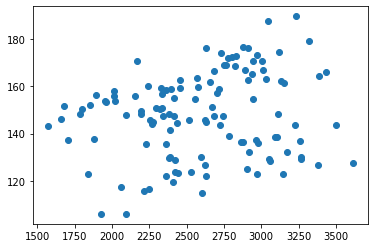

In [0]:
# Represento los datos generados
plt.scatter(regresion['bc'], regresion['pbi'])
plt.show()


In [0]:
#Corregimos el comentario de la regresion, para X 
aea=np.array(regresion['bc'])
X=aea.reshape(-1, 1)

In [0]:
#Lo mismo para Y
ae=np.array(regresion['pbi'])
Y=ae.reshape(-1,1)

In [0]:
import statsmodels.api as sm

# Creamos el modelo 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

# Generamos el cuadro con los resultados
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.964    
Dependent Variable:     y                AIC:                         1154.0347
Date:                   2020-04-05 03:21 BIC:                         1156.8305
No. Observations:       121              Log-Likelihood:              -576.02  
Df Model:               1                F-statistic:                 3215.    
Df Residuals:           120              Prob (F-statistic):          1.70e-88 
R-squared (uncentered): 0.964            Scale:                       805.42   
-------------------------------------------------------------------------------------
           Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
x1         0.0555         0.0010       56.7052       0.0000       0.0536       0.0575
-------------------------------------------------------------------------------
Omnibus:                   2.529             Durbin-Watson:               0.322
Prob(Omnibus):             0.282             Jarque-Bera (JB):            2.553
Skew:                      -0.318            Prob(JB):                    0.279
Kurtosis:                  2.681             Condition No.:               1    
===============================================================================

"""

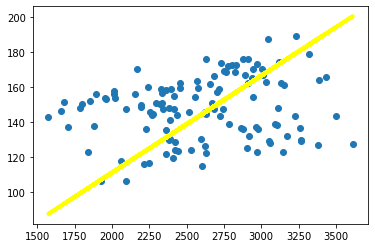

In [0]:
# Represento los datos generados
plt.scatter(X, Y)
plt.plot(X, predictions, color='yellow', linewidth=4)
plt.show()

In [0]:
#Otra opción para ver los estadísticos básicos:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.964    
Dependent Variable:     y                AIC:                         1154.0347
Date:                   2020-04-05 01:50 BIC:                         1156.8305
No. Observations:       121              Log-Likelihood:              -576.02  
Df Model:               1                F-statistic:                 3215.    
Df Residuals:           120              Prob (F-statistic):          1.70e-88 
R-squared (uncentered): 0.964            Scale:                       805.42   
-------------------------------------------------------------------------------------
           Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
x1         0.0555         0.0010       56.7052       0.0000       0.0536       0.0575
-------------------------------------------------------------------------------
Omnibus:                   2.529             Durbin-Watson:               0.322
Prob(Omnibus):             0.282             Jarque-Bera (JB):            2.553
Skew:                      -0.318            Prob(JB):                    0.279
Kurtosis:                  2.681             Condition No.:               1    
===============================================================================

"""

**Parte 2 : Regresión lineal múltiple**

In [0]:
DATA=pd.read_excel('CLASE 4.xlsx')

In [0]:
DATA.head()

,Unnamed: 0,TRASPASO,COMISIÓN,GASTO DE VENTAS,RENTA
0,TIEMPO,NaN,NaN,NaN,NaN
1,2013-09-01 00:00:00,0.4766,0.9598,0.3435,0.9846
2,2013-10-01 00:00:00,0.3059,0.9598,0.3391,0.9846
3,2013-11-01 00:00:00,0.2842,0.9598,0.3351,0.9846
4,2013-12-01 00:00:00,0.2406,0.9598,0.3381,0.9846


In [0]:
data=DATA.drop([0], axis=0)
data.head()

,Unnamed: 0,TRASPASO,COMISIÓN,GASTO DE VENTAS,RENTA
1,2013-09-01 00:00:00,0.4766,0.9598,0.3435,0.9846
2,2013-10-01 00:00:00,0.3059,0.9598,0.3391,0.9846
3,2013-11-01 00:00:00,0.2842,0.9598,0.3351,0.9846
4,2013-12-01 00:00:00,0.2406,0.9598,0.3381,0.9846
5,2014-01-01 00:00:00,0.2968,0.9598,0.3328,0.9846


In [0]:
X = data.iloc[:,2:5] ## Ingresamos nuestras variables dependientes
y = data["TRASPASO"] ## Ingresamos nuestras variables independientes
X = sm.add_constant(X) ## Añadiremos la constante según nuestro marco teórico

# Estructura del argumento para ejecutar el MCO
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Arrojaremos las estadísticas
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.475    
Dependent Variable: TRASPASO         AIC:                -226.8467
Date:               2020-04-05 03:34 BIC:                -217.7960
No. Observations:   71               Log-Likelihood:     117.42   
Df Model:           3                F-statistic:        22.12    
Df Residuals:       67               Prob (F-statistic): 4.58e-10 
R-squared:          0.498            Scale:              0.0022709
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               2.8802   0.9722  2.9625 0.0042  0.9397  4.8208
COMISIÓN           -1.5023   0.9672 -1.5532 0.1251 -3.4327  0.4282
GASTO DE VENTAS     1.4156   0.2256  6.2756 0.0000  0.9653  1.8658
RENTA              -1.6203   0.2574 -6.2951 0.0000 -2.1341 -1.1065
------------------------------------------------------------------
Omnibus:               1.589        Durbin-Watson:           1.034
Prob(Omnibus):         0.452        Jarque-Bera (JB):        0.936
Skew:                  0.211        Prob(JB):                0.626
Kurtosis:              3.372        Condition No.:           416  
==================================================================

"""

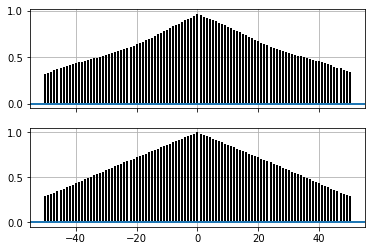

In [0]:
# Ejecucion de un correlograma
#https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9 -> Base
#https://matplotlib.org/3.2.0/gallery/lines_bars_and_markers/xcorr_acorr_demo.html -> Correlograma
np.random.seed(19680801)

x, y = np.random.randn(2, 100)
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(data.iloc[:,4], data["TRASPASO"], usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)

ax2.acorr(data.iloc[:,4], usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)

plt.show()

In [0]:
#Prueba de Breusch-Godfrey
BG = sm.stats.diagnostic.acorr_breusch_godfrey(model, nlags=1, store=False)
https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_breusch_godfrey.html 
BG

(12.1980371804132,
 0.0004783982475365747,
 13.691217355742864,
 0.00044124793408142454)

In [0]:
#glejser - goldlield quant - HETERO /// AUTO - VonNeuman -  Durbin Watson.
#Durbin-Watson test : https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html 
#Residuos : https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.resid.html 
sm.stats.stattools.durbin_watson(model.resid, axis=0)

0.321774447716486

In [0]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(prestige_model, fig=fig)